In [5]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import google.colab
from google.colab import drive

# Montar el Google Drive
drive.mount('/content/drive')

# Cargar el dataset
ruta_archivo = '/content/drive/MyDrive/fraud_detection_dataset.csv'
datos = pd.read_csv(ruta_archivo)

# Selección de características
caracteristicas = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'type']
X = datos[caracteristicas]
y = datos['isFraud']

# Preprocesamiento de datos
# Codificación one-hot para la columna 'type'
X = pd.get_dummies(X, columns=['type'])
nuevas_caracteristicas = list(X.columns)  # Guardar los nuevos nombres de características después de one-hot encoding

# Imputación de valores faltantes con KNNImputer
imputador = KNNImputer(n_neighbors=5)
X = imputador.fit_transform(X)

# Escalado de características numéricas
escalador = StandardScaler()
X = escalador.fit_transform(X)

# Balanceo de clases utilizando SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# División de los datos
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Entrenamiento de un modelo base
modelo_base = DecisionTreeClassifier(random_state=42)
modelo_base.fit(X_entrenamiento, y_entrenamiento)
puntaje_base = roc_auc_score(y_prueba, modelo_base.predict(X_prueba))
print(f"Puntaje base (sin optimización de hiperparámetros): {puntaje_base:.4f}")

# Optimización de hiperparámetros mediante GridSearchCV (si es necesario)
if puntaje_base < 0.8:
    param_grid = {
        'max_depth': [5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
    modelo = DecisionTreeClassifier(random_state=42)
    grid_search = GridSearchCV(modelo, param_grid, cv=3, scoring='roc_auc', n_jobs=2)
    grid_search.fit(X_entrenamiento, y_entrenamiento)

    # Construcción del modelo de árbol de decisión con los mejores hiperparámetros
    mejor_modelo = grid_search.best_estimator_

    # Predicciones
    y_pred = mejor_modelo.predict(X_prueba)

    # Evaluación del modelo
    print("Mejores hiperparámetros:", grid_search.best_params_)
    print("Exactitud:", accuracy_score(y_prueba, y_pred))
    print("ROC AUC:", roc_auc_score(y_prueba, y_pred))
    print("Informe de Clasificación:\n", classification_report(y_prueba, y_pred))
    print("Matriz de Confusión:\n", confusion_matrix(y_prueba, y_pred))

    # Métricas adicionales
    precision = precision_score(y_prueba, y_pred)
    print("Precisión:", precision)

    recall = recall_score(y_prueba, y_pred)
    print("Recall:", recall)

    f1 = f1_score(y_prueba, y_pred)
    print("F1-score:", f1)

    precision, recall, thresholds = precision_recall_curve(y_prueba, y_pred)
    auc_prc = auc(recall, precision)
    print("AUC-PRC:", auc_prc)

    # Visualización de las reglas del árbol de decisión
    from sklearn.tree import export_text
    reglas_arbol = export_text(mejor_modelo, feature_names=nuevas_caracteristicas)
    print(reglas_arbol)

else:
    print("El puntaje base es aceptable. No se realizará la optimización de hiperparámetros.")
    y_pred = modelo_base.predict(X_prueba)

    # Evaluación del modelo
    print("\n===== Informe de Evaluación del Modelo =====")
    print("Exactitud:", accuracy_score(y_prueba, y_pred))
    print("ROC AUC:", roc_auc_score(y_prueba, y_pred))
    print("\nInforme de Clasificación:")
    print(classification_report(y_prueba, y_pred))
    print("\nMatriz de Confusión:")
    print(confusion_matrix(y_prueba, y_pred))
    print("\nMétricas adicionales:")
    print("Precisión:", precision_score(y_prueba, y_pred))
    print("Recall:", recall_score(y_prueba, y_pred))
    print("F1-score:", f1_score(y_prueba, y_pred))

    precision, recall, thresholds = precision_recall_curve(y_prueba, y_pred)
    auc_prc = auc(recall, precision)
    print("AUC-PRC:", auc_prc)

    # Visualización de las reglas del árbol de decisión
    from sklearn.tree import export_text
    reglas_arbol = export_text(modelo_base, feature_names=nuevas_caracteristicas)
    print("\nReglas del Árbol de Decisión:")
    print(reglas_arbol)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Puntaje base (sin optimización de hiperparámetros): 0.9981
El puntaje base es aceptable. No se realizará la optimización de hiperparámetros.

===== Informe de Evaluación del Modelo =====
Exactitud: 0.9982505578805679
ROC AUC: 0.9980654113144335

Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1271511
           1       1.00      1.00      1.00    634811

    accuracy                           1.00   1906322
   macro avg       1.00      1.00      1.00   1906322
weighted avg       1.00      1.00      1.00   1906322


Matriz de Confusión:
[[1269756    1755]
 [   1580  633231]]

Métricas adicionales:
Precisión: 0.9972361595373757
Recall: 0.9975110702240509
F1-score: 0.9973735959369884
AUC-PRC: 0.9977880254577303

Reglas del Árbol de Decisión:
|--- oldbalanceOrg <= -0.27
|   |--- type_T

<ipython-input-7-335891c5ab3b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metricas, y=valores, palette='viridis')


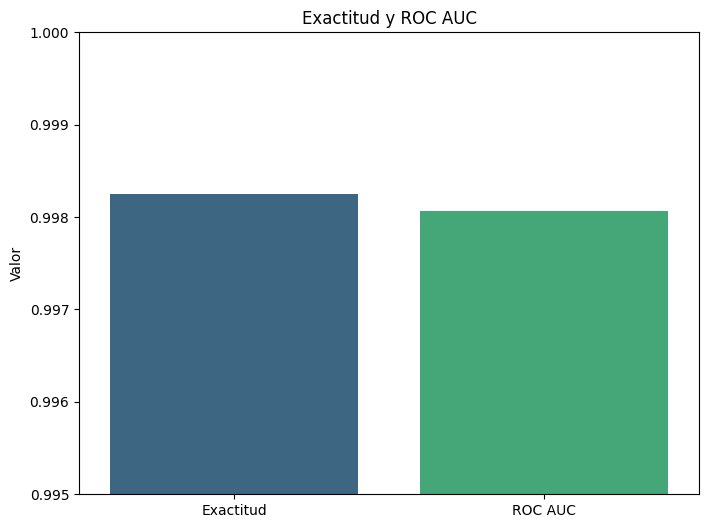


Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1271511
           1       1.00      1.00      1.00    634811

    accuracy                           1.00   1906322
   macro avg       1.00      1.00      1.00   1906322
weighted avg       1.00      1.00      1.00   1906322



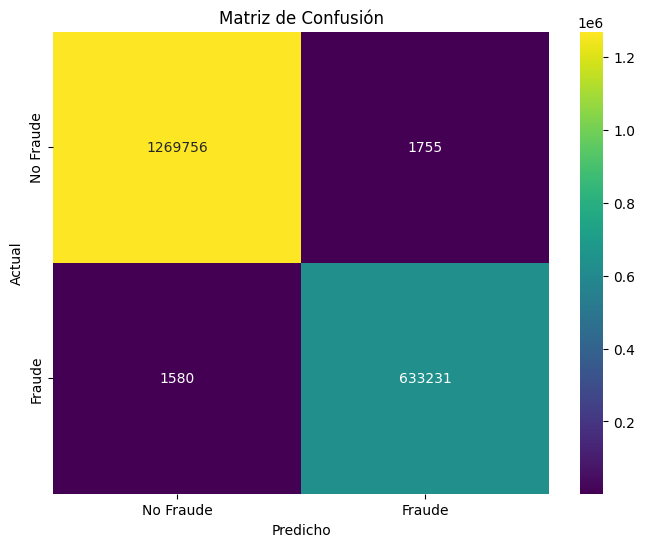

<ipython-input-7-335891c5ab3b>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metricas_adicionales, y=valores_adicionales, palette='viridis')


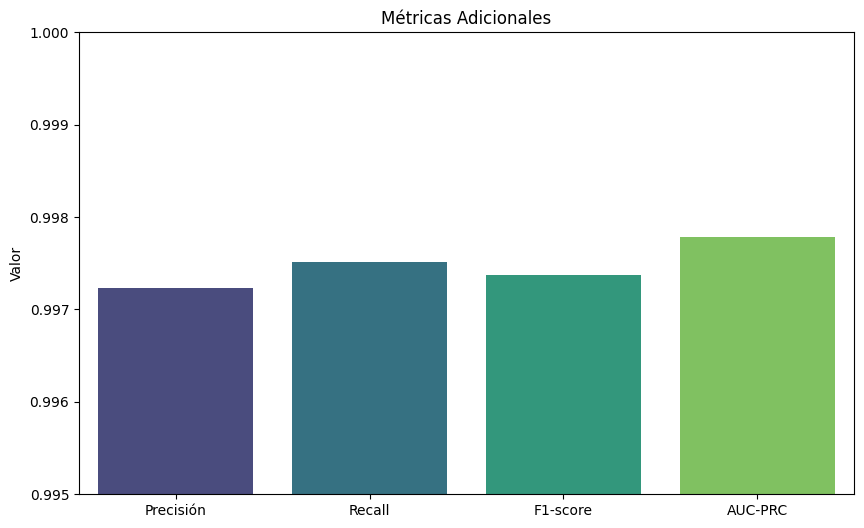

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Exactitud y ROC AUC
exactitud = 0.9982505578805679
roc_auc = 0.9980654113144335

# Crear una figura para las métricas exactitud y ROC AUC
plt.figure(figsize=(8, 6))
metricas = ['Exactitud', 'ROC AUC']
valores = [exactitud, roc_auc]
sns.barplot(x=metricas, y=valores, palette='viridis')
plt.ylim(0.995, 1.0)
plt.title('Exactitud y ROC AUC')
plt.ylabel('Valor')
plt.show()

# Informe de Clasificación
informe_clasificacion = """
Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1271511
           1       1.00      1.00      1.00    634811

    accuracy                           1.00   1906322
   macro avg       1.00      1.00      1.00   1906322
weighted avg       1.00      1.00      1.00   1906322
"""
print(informe_clasificacion)

# Matriz de Confusión
cm = [[1269756, 1755], [1580, 633231]]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=['No Fraude', 'Fraude'], yticklabels=['No Fraude', 'Fraude'])
plt.title('Matriz de Confusión')
plt.ylabel('Actual')
plt.xlabel('Predicho')
plt.show()

# Métricas Adicionales
precision = 0.9972361595373757
recall = 0.9975110702240509
f1_score = 0.9973735959369884
auc_prc = 0.9977880254577303

# Crear una figura para las métricas adicionales
plt.figure(figsize=(10, 6))
metricas_adicionales = ['Precisión', 'Recall', 'F1-score', 'AUC-PRC']
valores_adicionales = [precision, recall, f1_score, auc_prc]
sns.barplot(x=metricas_adicionales, y=valores_adicionales, palette='viridis')
plt.ylim(0.995, 1.0)
plt.title('Métricas Adicionales')
plt.ylabel('Valor')
plt.show()
